In [11]:
import pandas as pd
data_df = pd.read_csv('https://query.data.world/s/qffqz4g7rjqvfmvuyhlob4obdzdr4q')

In [12]:
import numpy as np
np.random.seed(12345)
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
data_df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Histogram of Target

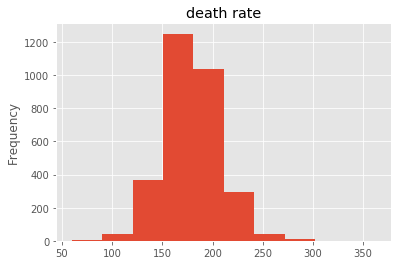

In [14]:
ax = data_df.target_deathrate.plot(kind='hist', title='death rate')

# Univariate Correlations

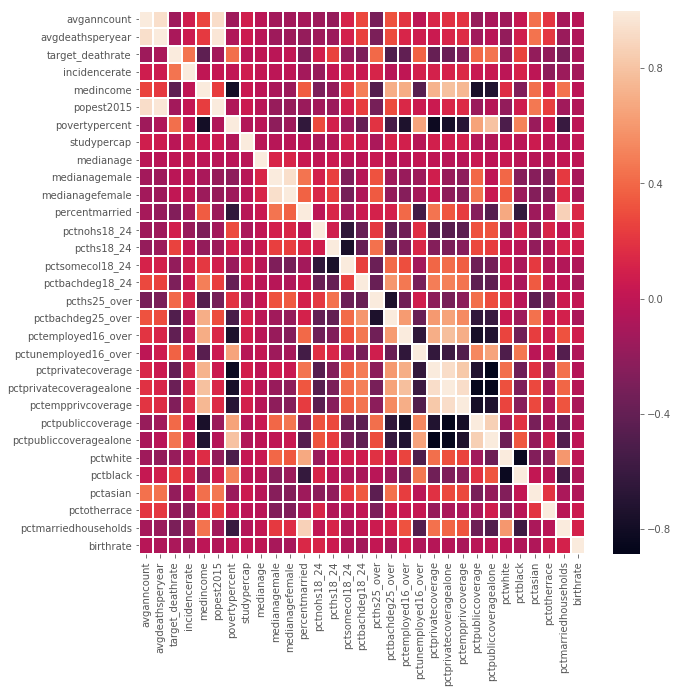

In [15]:
corrs = data_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corrs, ax=ax, linewidths=1)

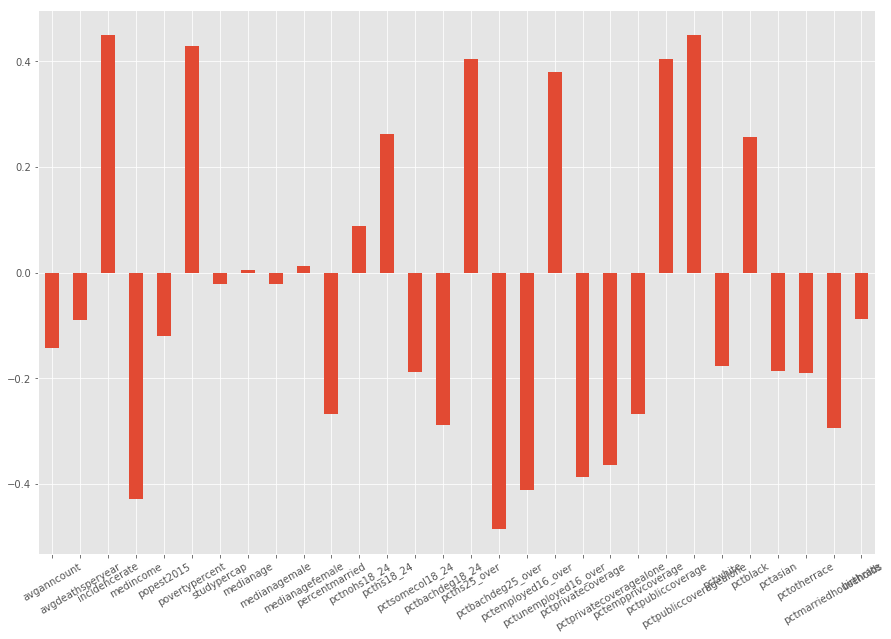

In [16]:
corrs = data_df.drop('target_deathrate', axis=1).corrwith(data_df.target_deathrate)
fig, ax = plt.subplots(figsize=(15, 10))
corrs.plot(kind='bar', ax=ax, rot=30)

In [17]:
corrs.abs().nlargest(4)

pctbachdeg25_over         0.485477
incidencerate             0.449432
pctpubliccoveragealone    0.449358
povertypercent            0.429389
dtype: float64

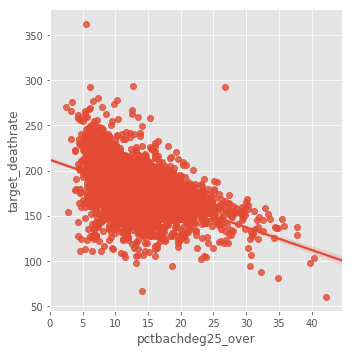

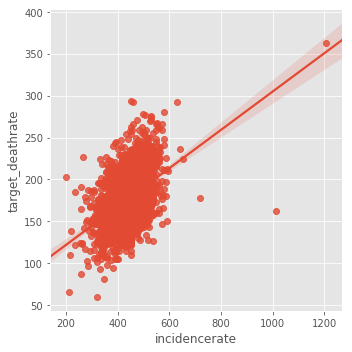

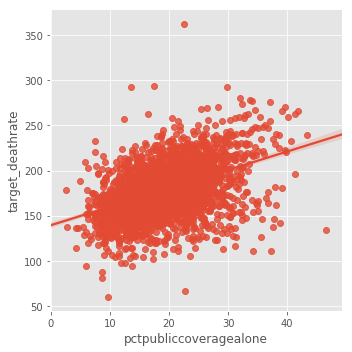

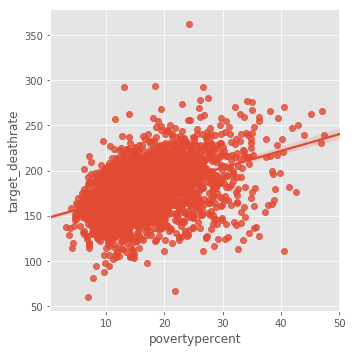

In [18]:
top_cols = corrs.abs().nlargest(4).index

for colname in top_cols:
    sns.lmplot(colname, 'target_deathrate', data=data_df)

# Dimension Reduction

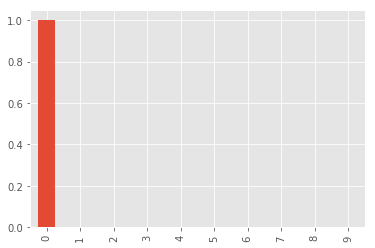

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=12345)
pca = pca.fit(
    data_df.drop(['target_deathrate', 'binnedinc', 
                  'geography', 'pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone'], 
                 axis=1))
ratios = pca.explained_variance_ratio_
ax = pd.Series(ratios).plot(kind='bar')

# Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('pca', PCA(n_components=2, random_state=12345)),
    ('model', LinearRegression())
])

X = data_df.drop(['target_deathrate', 'binnedinc', 
                  'geography', 'pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone'], 
                 axis=1).values

y = data_df.target_deathrate.values

cv = KFold(n_splits=10, random_state=12345)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

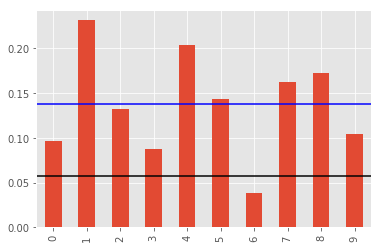

In [21]:
scores = pd.Series(scores, name='cross validation scores')
ax = scores.plot(kind='bar')
line = ax.axhline(scores.mean(), color='blue')
line = ax.axhline(scores.std(), color='black')

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('pca', PCA(n_components=2, random_state=12345)),
    ('model', DecisionTreeRegressor())
])

X = data_df.drop(['target_deathrate', 'binnedinc', 
                  'geography', 'pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone'], 
                 axis=1).values

y = data_df.target_deathrate.values

cv = KFold(n_splits=10, random_state=12345)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

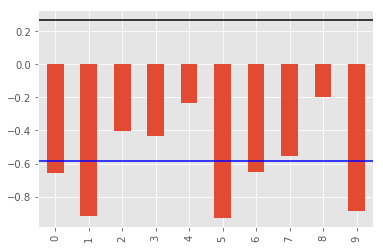

In [23]:
scores = pd.Series(scores, name='cross validation scores (decision tree)')
ax = scores.plot(kind='bar')
line = ax.axhline(scores.mean(), color='blue')
line = ax.axhline(scores.std(), color='black')